In [1]:
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

# Biased coin

We have a biased coin and we want to estimate the probability - how biased it is? p
and our certainty in this value, this is and interval (p-s,p+s) such that probability of the biased being there is higher than 1-$\alpha$.


In [2]:
x = array([0,0,1,0,0,0,0,0,1,0])
print(x)

[0 0 1 0 0 0 0 0 1 0]


We can assume that the distibution obtained is similar to correct one and resample it, in order to access to its variability

In [3]:
ids = randint(10,size=10)
print(ids+1)
print(x[ids])
print(x[ids].sum()/10.)

[ 3 10  7  3 10  1  3  6  3  2]
[1 0 0 1 0 0 1 0 1 0]
0.4


In [4]:
p = []
for i in range(10000):
    ids = randint(10,size=10)  
    p.append(x[ids].sum()/10.)

    

0.20132000000000003 0.1257786054939392
Standard estimators: 0.2 0.1264911064067352


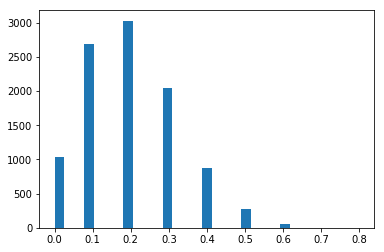

In [5]:
hist(p,31)
pe = x.sum()/10.
print(mean(p),std(p))
print("Standard estimators:",pe,sqrt(pe*(1-pe)/10.))

In [6]:
import pickle


In [7]:
with open("data_Fullset/Fullset.pkl","rb") as f:
    data = pickle.load(f)

In [8]:
data.keys()

Index(['#Bch', 'Dsb', 'Dss', 'd_interSp', 'Vtot', 'Vh', 'Ln', 'SA', 'nPSD',
       'A1', 'A2', 'GPHN SNR', 'DiS-EMchk', 'Lneck', 'maxDneck', 'minDneck',
       'meanDneck', 'Rneck', 'Lhead', 'maxDhead', 'minDhead', 'meanDhead',
       'Ah', 'Rhead'],
      dtype='object')

(0, 1.0)

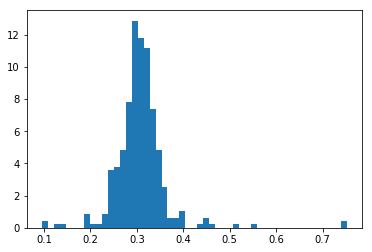

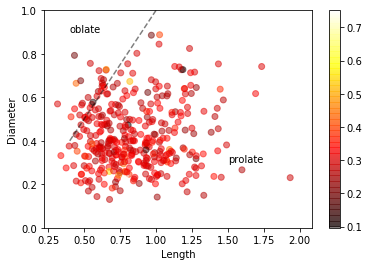

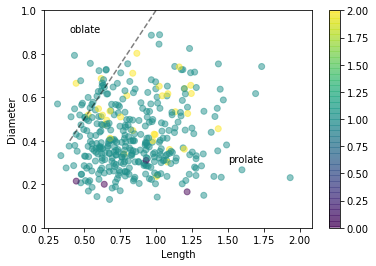

In [26]:
sphericity = pi**(1./3.0)*(6*data['Vh'])**(2./3.0)/data['Ah']
sel = isfinite(sphericity)
sphericity = sphericity[sel]
hist(sphericity,51,density=True)
figure()
#plot(data['Lhead'],data['maxDhead']/1e3,'.',alpha=0.5)
scatter(data['Lhead'][sel],data['maxDhead'][sel]/1e3,c=sphericity,cmap=get_cmap('hot'),alpha=0.5)
colorbar()
plot(linspace(0.4,2.),linspace(0.4,2.),'k--',alpha=0.5)
xlabel("Length")
ylabel('Diameter')
annotate('oblate',xy = (0.4,0.9))
annotate('prolate',xy = (1.5,0.3))

ylim(0,1.)
figure()
#plot(data['Lhead'],data['maxDhead']/1e3,'.',alpha=0.5)
scatter(data['Lhead'][sel],data['maxDhead'][sel]/1e3,c=data['nPSD'][sel],alpha=0.5)
colorbar()
plot(linspace(0.4,2.),linspace(0.4,2.),'k--',alpha=0.5)
xlabel("Length")
ylabel('Diameter')
annotate('oblate',xy = (0.4,0.9))
annotate('prolate',xy = (1.5,0.3))
ylim(0,1.)


In [25]:
sel = (data['Lhead']>0.5)*(data['Lhead']<0.75)* \
       (data['maxDhead']/1e3>0.5)*(data['maxDhead']/1e3<.6)
idcs = arange(data['Lhead'].shape[0])[sel]
data['nPSD'][idcs]

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


spID
180609DDT5_2_Q            1.0
180609DDT5_2_S            1.0
180609DDT5_2_U            2.0
180618Lmoz3_U             1.0
180618Mmoz3_2-1_K         NaN
180618Mmoz3_2-1_T         1.0
180618Mmoz4_2_S'          1.0
180618Mmoz5_2_L'          1.0
180618Mmoz5_2_N           1.0
180618Mmoz6_1_A           1.0
180626RR1_1_A'            1.0
180626RR1_1_I             2.0
180626RR3_1_B             1.0
180626RR3_1_T             1.0
180626RR3_1_V             1.0
180626RR4_2_PP            1.0
180626Rmoz-fork_1-1_H'    1.0
180626Rmoz-fork_1-1_Y     1.0
180626Rmoz-fork_1-3_F     1.0
180626Rmoz-fork_1-3_R     1.0
180723LL3_1_A_DiS         2.0
180723LL3_1_C_DiS         2.0
Name: nPSD, dtype: float64

In [24]:
data.keys()

Index(['#Bch', 'Dsb', 'Dss', 'd_interSp', 'Vtot', 'Vh', 'Ln', 'SA', 'nPSD',
       'A1', 'A2', 'GPHN SNR', 'DiS-EMchk', 'Lneck', 'maxDneck', 'minDneck',
       'meanDneck', 'Rneck', 'Lhead', 'maxDhead', 'minDhead', 'meanDhead',
       'Ah', 'Rhead'],
      dtype='object')

Text(0.5,3.3,'prolate')

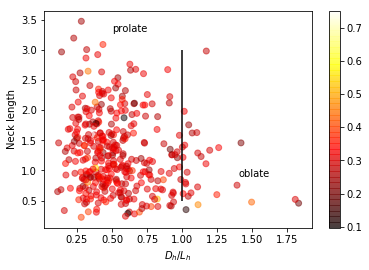

In [18]:
scatter(data['maxDhead'][sel]/1e3/data['Lhead'][sel],data['Lneck'][sel],c=sphericity,cmap = get_cmap('hot'),alpha=0.5)
#plot(linspace(0.4,2.),linspace(0.4,2.),'k--',alpha=0.5)
colorbar()
vlines(1,0.5,3)
xlabel("$D_h/L_h$")
ylabel('Neck length')
annotate('oblate',xy = (1.4,0.9))
annotate('prolate',xy = (0.5,3.3))

#ylim(0,1.5)

In [11]:
def ellipsoid(a= 1,b = 1, alpha=0,  np = 101):
    th = linspace(alpha,2*pi-alpha,np)
    x = a*sin(th+pi)
    y = b*cos(th+pi)
    return((x,y))

def simplesp(D0,D1,Dn,Ln):
    db = D1/2.0#/D0
    dnb = min(Dn/D1,1)
    alpha = arcsin(dnb)
    xe,ye = ellipsoid(db,D0/2.0,alpha)
    y0n = linspace(0,-Ln,3)-D0/2.0
    x0nl = y0n*0-Dn/2.0
    x0nr = y0n*0+Dn/2.0
    x = concatenate((x0nl,xe,x0nr))
    y = concatenate((y0n,ye,y0n))
    return((x,y))

def kinksp(D0,D1,Dn,Ln,Dnmin):
    db = D1/2.0#/D0
    dnb = min(Dn/D1,1)
    alpha = arcsin(dnb)
    xe,ye = ellipsoid(db,D0/2.0,alpha)
    headbase = -D0*cos(alpha)/2.0
    y0n = linspace(0,-Ln,100)+headbase
    yb = linspace(0,-Ln,3)+headbase
    x0 = Dnmin+(y0n-yb[1])**2/(Ln/2)**2*(Dn-Dnmin)
    x0nl = y0n*0-x0/2.0
    x0nr = y0n*0+x0/2.0
    sel = arange(len(y0n),0,-1)-1
    x = concatenate((x0nl,xe,x0nr))
    y = concatenate((y0n[sel],ye,y0n))
    return((x,y))

def generatesp(i,lplot = False):
    D0 = data['Lhead'][i]
    D1 = data['maxDhead'][i]/1e3
    Dn = data['meanDneck'][i]/1e3
    Ln = data['Lneck'][i]
    sp = kinksp(D0,D1,Dn,Ln,data['minDneck'][i]/1e3)
    if lplot == True:
        plot(sp[0],sp[1],'-')
    return(sp)

In [71]:
xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x7f2bf8fcfa90>

(-0.5, 0.5, 0.0, 3.0)

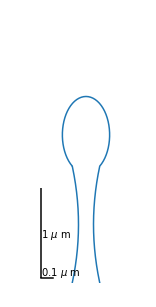

In [39]:
figure(figsize=(2,5))
D0 = data['Lhead'].mean()
D1 = data['maxDhead'].mean()/1e3
Dn = data['meanDneck'].mean()/1e3
Ln = data['Lneck'].mean()
sp = kinksp(D0,D1,Dn,Ln,mean(data['minDneck']/1e3))
plot(sp[0],sp[1]-min(sp[1]),'-')
vlines(-0.4,0.05,1.05)
plot(linspace(-0.4,-0.3),linspace(-0.4,-0.3)*0+0.05,'k')
annotate('1 $\mu$ m',xy = (-0.4,0.5))
annotate('0.1 $\mu$ m',xy = (-0.4,0.08))

xlim(-.5,.5)
ylim(0,3)
axis('off')

In [41]:
D0 = data['Lhead']
D1 = data['maxDhead']/1e3
Dn = data['meanDneck']/1e3
Dm = data['minDneck']/1e3
Ln = data['Lneck']
selLL = arange(374)[(D1/D0<0.5)*(Ln<1.)]
selUL = arange(374)[(D1/D0<0.5)*(Ln>2.5)]
selLR = arange(374)[(D1/D0>1.5)*(Ln<1)]
print(selLL,selUL,selLR)

[ 15  19  22  27  29  37  41  49  52  56  61  62  68  73  76  78  87  89
  92  99 112 115 119 120 128 137 139 153 156 159 165 175 180 181 189 201
 202 203 204 211 213 219 221 225 226 228 238 243 245 246 252 260 276 286
 289 291 297 304 306 317 328 339 349 361 363 364 366 368] [  4   5  46  50  54  81  82 101 295 308 335] [28 79]


/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [42]:
D0s = [D0[4],D0[37],D0[28],D0[28]]
D1s = [D1[4],D1[37],D1[28],D1[28]]
Dns = [Dn[4],Dn[37],Dn[28],Dn[28]]
Dms = [Dm[4],Dm[37],Dm[28],Dm[28]]

Lns = [Ln[4],Ln[37],Ln[4],Ln[28]]

Text(-0.4,0.08,'0.1 $\\mu$ m')

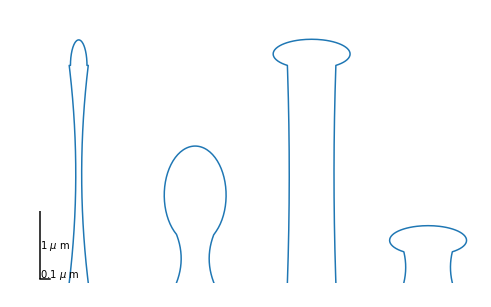

In [53]:
fig,ax = subplots(1,4,figsize = (2*4,5*1))
D0 = data['Lhead'].mean()
D1 = data['maxDhead'].mean()/1e3
Dn = data['meanDneck'].mean()/1e3
Ln = data['Lneck'].mean()
sp = kinksp(D0,D1,Dn,Ln,mean(data['minDneck']/1e3))

for i in range(2):
    for j in range(2):
        D0 = D0s[i+j*2]
        D1 = D1s[i+j*2]
        Dn = Dns[i+j*2]
        Ln = Lns[i+j*2]
        Dm = Dms[i+j*2]
        sp = kinksp(D0,D1,Dn,Ln,Dm)
        ax[i+2*j].plot(sp[0],sp[1]-min(sp[1]))
        ax[i+2*j].set_xlim(-.5,.5)
        ax[i+2*j].set_ylim(0,4)
        ax[i+2*j].axis('off')
        ax[i+2*j].axis('off')
ax[0].vlines(-0.4,0.05,1.05)
ax[0].plot(linspace(-0.4,-0.3),linspace(-0.4,-0.3)*0+0.05,'k')
ax[0].annotate('1 $\mu$ m',xy = (-0.4,0.5))
ax[0].annotate('0.1 $\mu$ m',xy = (-0.4,0.08))

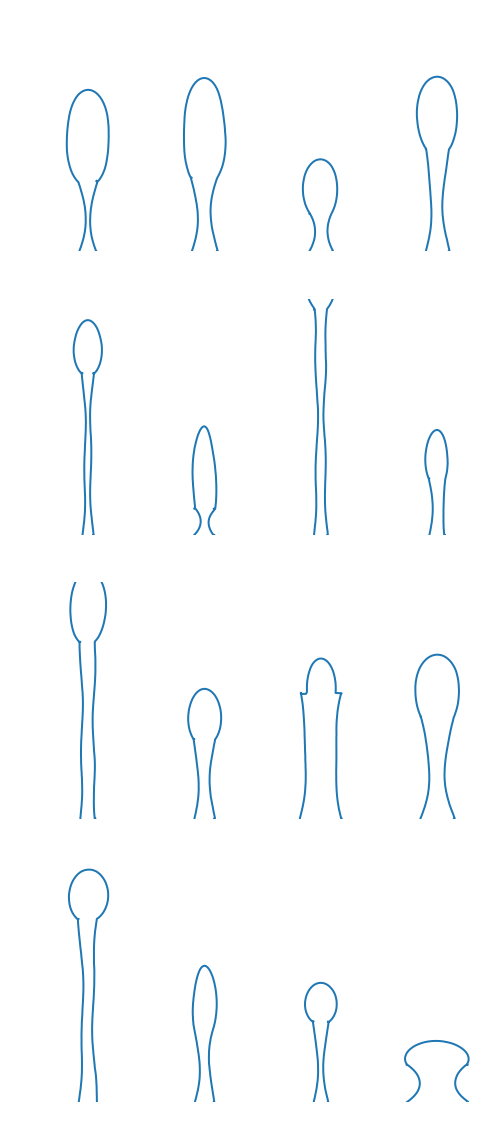

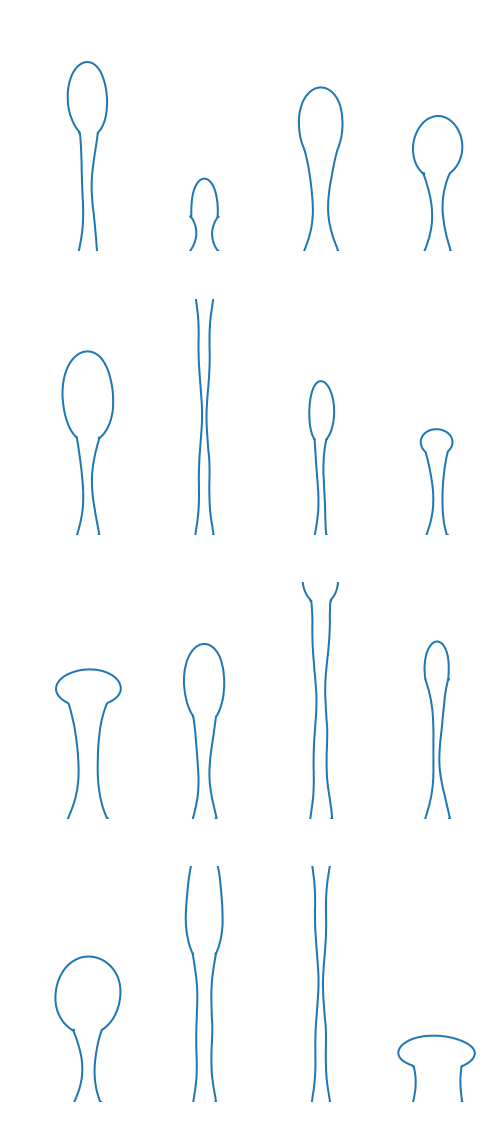

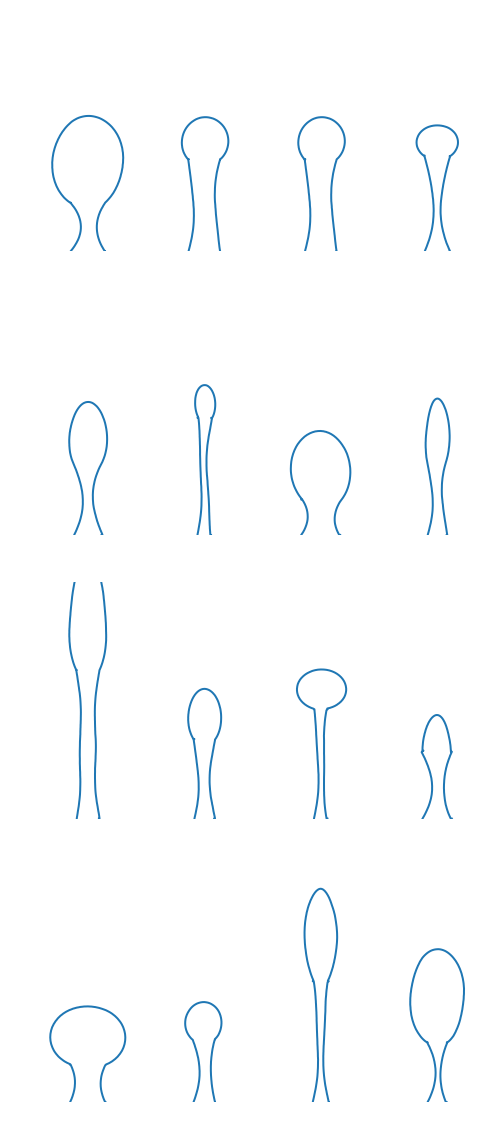

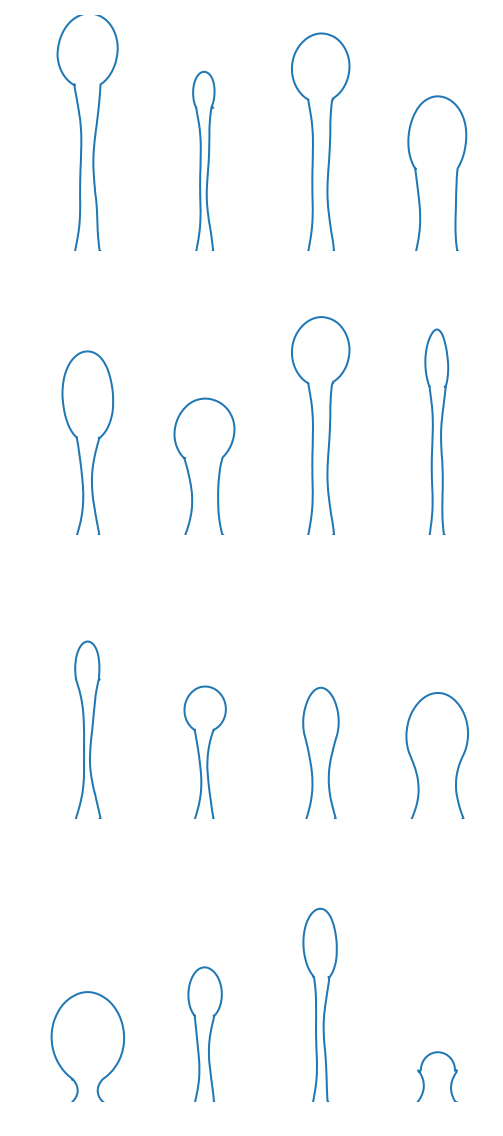

In [266]:
#figure(figsize=(2,5))
for k in range(4):
    fig,ax = subplots(4,4,figsize = (2*4,5*4))
    for i in range(4):
        for j in range(4):
            sp = generatesp(randint(170))
            ax[i,j].plot(sp[0],sp[1]-min(sp[1]))
            ax[i,j].set_xlim(-.5,.5)
            ax[i,j].set_ylim(0,max(3,max(sp[1])*1.05))
            ax[i,j].axis('off')
    fig.savefig('spines_'+str(k)+'.png')